# Projeto 1 - Classificação binária - Breast Cancer

## 1. Importando bibliotecas

In [1]:
import torch.nn as nn
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import torch

In [2]:
torch.set_default_device("mps")
device = torch.device("mps")

# torch.set_default_device("cpu")
# device = torch.device("cpu")

In [3]:
print(torch.backends.mps.is_available())  # Deve retornar True
print(torch.backends.mps.is_built())  # Deve retornar True

True
True


## 2. Importando dados

In [4]:
np.random.seed(123)
torch.manual_seed(123)

In [5]:
previsores = pd.read_csv("data/entradas_breast.csv")
classe = pd.read_csv("data/saidas_breast.csv")

In [6]:
previsores.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.0000,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678


In [7]:
classe.head()

,0
0,0
1,0
2,0
3,0
4,0


In [8]:
np.unique(classe)

array([0, 1])

In [9]:
classe

,0
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


#### Dividindo em treino e teste

In [10]:
previsores_treino, previsores_teste, classe_treino, classe_teste = train_test_split(previsores, classe, test_size = 0.25)

## 3. Transformando dados para tensores

In [11]:
previsores_treino = torch.tensor(np.array(previsores_treino), dtype=torch.float)
classe_treino = torch.tensor(np.array(classe_treino), dtype=torch.float)

In [12]:
type(previsores_treino), type(classe_treino)

(torch.Tensor, torch.Tensor)

In [13]:
dataset = torch.utils.data.TensorDataset(previsores_treino, classe_treino)

In [14]:
dataset

In [15]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True, pin_memory=False,  # MPS não suporta pin_memory=True
                                                                              generator=torch.Generator(device=device))

In [16]:
previsores_treino

tensor([[1.1540e+01, 1.4440e+01, 7.4650e+01,  ..., 6.9180e-02, 2.3290e-01,
         8.1340e-02],
        [2.0310e+01, 2.7060e+01, 1.3290e+02,  ..., 1.6970e-01, 3.1510e-01,
         7.9990e-02],
        [1.1360e+01, 1.7570e+01, 7.2490e+01,  ..., 8.6980e-02, 2.9730e-01,
         7.7450e-02],
        ...,
        [1.2050e+01, 2.2720e+01, 7.8750e+01,  ..., 1.0920e-01, 2.1910e-01,
         9.3490e-02],
        [2.0440e+01, 2.1780e+01, 1.3380e+02,  ..., 1.7650e-01, 2.6090e-01,
         6.7350e-02],
        [1.1740e+01, 1.4690e+01, 7.6310e+01,  ..., 1.0560e-01, 2.6040e-01,
         9.8790e-02]], device='mps:0')

## 4. Construção do Modelo

##### 30 neuronios entrada > 16 > 16 > 1

In [17]:
classificador = nn.Sequential(
    nn.Linear(in_features=30, out_features=16),
    nn.ReLU(),
    nn.Linear(in_features=16, out_features=16),
    nn.ReLU(),
    nn.Linear(in_features=16, out_features=1),
    nn.Sigmoid()
)

classificador = classificador.to(device)

In [18]:
classificador.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)>

In [19]:
criterion = nn.BCELoss()

In [20]:
for param in classificador.parameters():
    print(param.device)

mps:0
mps:0
mps:0
mps:0
mps:0
mps:0


In [21]:
optimizer = torch.optim.Adam(classificador.parameters(), lr=0.001, weight_decay=0.0001)

## 5. Treinamento do Modelo

In [22]:
train_loader

In [23]:
for epoch in range(100):
    running_loss = 0.

    for data in train_loader:
        inputs, labels = data #previsores, classes - tensor com quantidade batch_size
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad() #zerar o gradiente para o calculo

        # Forward
        outputs = classificador(inputs) # classificador.forward(inputs) -> previsões
        #print(outputs)

        # Calculo do Erro
        loss = criterion(outputs, labels) #
        #print(loss)

        # Backpropagation
        loss.backward()
        optimizer.step()

        # atualiza o erro
        running_loss += loss.item()

    print(f"Epoch: {epoch}, loss: {running_loss/len(train_loader)}")
        

Epoch: 0, loss: 11.251024766023768
Epoch: 1, loss: 2.6486547930642614
Epoch: 2, loss: 0.6743210117917421
Epoch: 3, loss: 0.6711822730857272
Epoch: 4, loss: 0.4064685710554206
Epoch: 5, loss: 0.3932128299114316
Epoch: 6, loss: 0.36739525913672394
Epoch: 7, loss: 0.3312414515503617
Epoch: 8, loss: 0.3608907426512519
Epoch: 9, loss: 0.3619464353420014
Epoch: 10, loss: 0.3785589252446973
Epoch: 11, loss: 0.35524273533807244
Epoch: 12, loss: 0.3858393608744061
Epoch: 13, loss: 0.3302256726594858
Epoch: 14, loss: 0.2834021557382373
Epoch: 15, loss: 0.27898945851078216
Epoch: 16, loss: 0.3497392293282373
Epoch: 17, loss: 0.2625129025342853
Epoch: 18, loss: 0.2651733042195786
Epoch: 19, loss: 0.3678687696513005
Epoch: 20, loss: 0.22731209593976653
Epoch: 21, loss: 0.2494706579072531
Epoch: 22, loss: 0.2512568621138154
Epoch: 23, loss: 0.3334894825292881
Epoch: 24, loss: 0.2553250377694535
Epoch: 25, loss: 0.22400240890335205
Epoch: 26, loss: 0.25096760222385095
Epoch: 27, loss: 0.2491925068112

## 6. Visualização dos pesos

In [24]:
params = list(classificador.parameters())

In [25]:
pesos0 = params[0]
pesos0.shape

torch.Size([16, 30])

In [26]:
pesos0

Parameter containing:
tensor([[ 1.7269e-01,  1.0874e-01,  2.9318e-01,  8.1048e-03, -5.0530e-01,
         -3.6947e-01,  6.4259e-02, -7.5210e-02,  1.5010e-01,  2.8459e-01,
          8.9032e-02, -2.2256e-01,  1.2595e-02, -2.2087e-01,  1.9787e-03,
         -6.8040e-02,  3.3674e-02,  1.6470e-01,  1.2392e-01, -4.9893e-03,
          3.5700e-01,  7.3902e-02,  5.0374e-02,  3.9721e-02,  1.3876e-01,
          1.1353e-01,  8.7007e-02, -1.1745e-01, -2.1853e-02,  8.6304e-02],
        [ 2.8616e-02,  4.6899e-03, -1.2149e-01, -1.1138e-01, -1.0158e-33,
         -1.0559e-33,  9.6204e-34,  1.0278e-33,  3.8981e-06, -9.9920e-34,
          5.4601e-04, -1.6650e-01, -3.0158e-02,  2.2729e-04,  1.0511e-33,
          1.0566e-33,  1.0524e-33, -1.0545e-33,  1.0293e-33,  9.5550e-34,
         -1.6180e-02,  5.7146e-03, -8.0155e-02,  9.7647e-03, -9.9899e-34,
         -9.7427e-34, -1.0249e-33,  9.5662e-34, -1.0082e-33, -1.0310e-33],
        [-1.4288e-01,  7.1748e-02,  7.4040e-02, -1.5844e-01,  1.2009e-01,
          2.78

In [27]:
bias0 = params[1]
bias0.shape

torch.Size([16])

In [28]:
pesos1 = params[2]
pesos1.shape

torch.Size([16, 16])

In [29]:
bias1 = params[3]
bias1.shape

torch.Size([16])

In [30]:
pesos2 = params[4]
pesos2.shape

torch.Size([1, 16])

In [31]:
bias2 = params[3]
bias2.shape

torch.Size([16])

In [32]:
pesos3 = params[5]
pesos3.shape

torch.Size([1])

## 7. Avaliação do modelo

In [33]:
classificador.eval()

Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

In [34]:
type(previsores_teste)

pandas.core.frame.DataFrame

In [35]:
previsores_teste = torch.tensor(np.array(previsores_teste), dtype=torch.float)

In [36]:
previsoes = classificador.forward(previsores_teste)

In [37]:
previsoes

tensor([[9.9558e-01],
        [1.0000e+00],
        [6.3017e-01],
        [9.8859e-01],
        [1.5052e-05],
        [2.4013e-01],
        [9.7825e-01],
        [9.9106e-01],
        [7.7648e-01],
        [9.2053e-01],
        [7.3426e-01],
        [5.6456e-01],
        [9.4000e-11],
        [9.9372e-01],
        [9.9994e-01],
        [8.8707e-01],
        [9.9267e-01],
        [1.0000e+00],
        [6.0248e-01],
        [9.9969e-01],
        [8.3005e-15],
        [2.2089e-02],
        [7.2388e-01],
        [1.0000e+00],
        [9.7002e-01],
        [2.3796e-02],
        [6.6140e-01],
        [9.9898e-01],
        [5.6371e-03],
        [9.9683e-01],
        [6.5973e-01],
        [9.9961e-01],
        [9.5777e-01],
        [9.6629e-01],
        [1.4139e-01],
        [9.9435e-01],
        [8.6537e-01],
        [9.9983e-01],
        [9.9727e-01],
        [1.2745e-05],
        [6.8913e-03],
        [6.3885e-01],
        [9.7137e-08],
        [6.4609e-01],
        [1.4106e-05],
        [8

In [38]:
previsoes = previsoes.cpu()

In [39]:
previsoes = np.array(previsoes > 0.5)

/var/folders/rb/g2rznbp50d56w_26l6lfc72c0000gn/T/ipykernel_15102/3535737125.py:1: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  previsoes = np.array(previsoes > 0.5)


In [40]:
previsoes

array([[ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [

In [41]:
taxa_acerto = accuracy_score(classe_teste, previsoes)
taxa_acerto

0.916083916083916

In [42]:
matriz = confusion_matrix(classe_teste, previsoes)
matriz

array([[45,  9],
       [ 3, 86]])

<Axes: >

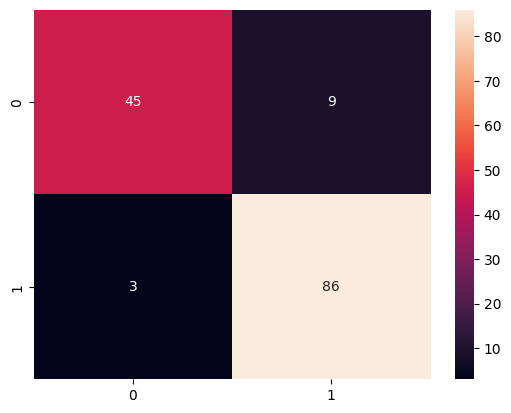

In [43]:
sns.heatmap(matriz, annot=True)